In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

C:\Users\leeye\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [5]:
import seaborn as sns
sns.set()

# Customers

In [6]:
customers = pd.read_csv("data/olist_customers_dataset.csv")

In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
print("% of customers with repeat orders")
repeats = (customers.customer_unique_id.value_counts().value_counts(normalize=True).sort_index() * 100)
print(repeats)
print(round(100-repeats[1], 2), "% of customers are repeat customers")

% of customers with repeat orders
1     96.881244
2      2.856518
3      0.211247
4      0.031219
5      0.008325
6      0.006244
7      0.003122
9      0.001041
17     0.001041
Name: customer_unique_id, dtype: float64
3.12 % of customers are repeat customers


In [9]:
print(len(customers.customer_unique_id.unique()), "unique customers")

96096 unique customers


In [10]:
customers.drop('customer_id', axis=1).drop_duplicates().shape[0]

96352

We have some customers who changed zip code over the course of their orders. 

In [11]:
customers.drop('customer_id', axis=1).drop_duplicates().groupby('customer_unique_id').size().sort_values(ascending=False).head()

customer_unique_id
d44ccec15f5f86d14d6a2cfa67da1975    3
9832ae2f7d3e5fa4c7a1a06e9551bc61    3
3e43e6105506432c953e165fb2acf44c    3
b9badb100ff8ecc16a403111209e3a06    3
44b6bbfea26596437062a38c8e6bcec1    2
dtype: int64

In [12]:
customers[customers.customer_unique_id == 'd44ccec15f5f86d14d6a2cfa67da1975']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
45851,844a7e5d2737f2f6667a5242486cbcb1,d44ccec15f5f86d14d6a2cfa67da1975,3533,sao paulo,SP
57951,105e31e3b36d904c70058578126c4d12,d44ccec15f5f86d14d6a2cfa67da1975,62800,aracati,CE
83347,488dd91f70d8404b2aa677cdc8a0de68,d44ccec15f5f86d14d6a2cfa67da1975,88371,navegantes,SC


In [13]:
customers[customers.customer_unique_id == '9832ae2f7d3e5fa4c7a1a06e9551bc61']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
30846,1e43f63c1584c4703baf3b71577f0bc8,9832ae2f7d3e5fa4c7a1a06e9551bc61,25213,duque de caxias,RJ
68788,7c5df4a2ffa11a657198a578c83fd58f,9832ae2f7d3e5fa4c7a1a06e9551bc61,20520,rio de janeiro,RJ
74754,5352d7b0e81c3b107191e70df710c5c5,9832ae2f7d3e5fa4c7a1a06e9551bc61,25212,duque de caxias,RJ


# Orders

In [14]:
orders = pd.read_csv("data/olist_orders_dataset.csv").merge(customers, on='customer_id').drop('customer_id', axis=1)

for col in orders.columns:
    if col.endswith('_date'):
        orders[col] = pd.to_datetime(orders[col])

In [15]:
orders['delivery_diff'] = orders.order_estimated_delivery_date - orders.order_delivered_customer_date

In [16]:
orders.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_diff
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9 days 05:42:58


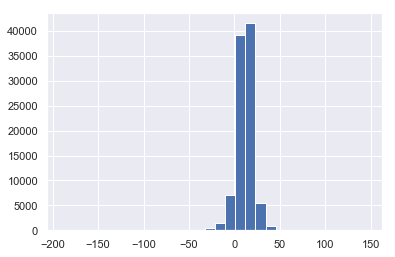

In [17]:
orders.delivery_diff.dt.days.hist(bins = 30)

In [18]:
orders.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_diff
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9 days 05:42:58


In [19]:
orders.order_status.value_counts(normalize=True) * 100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

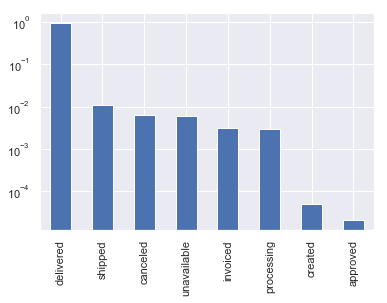

In [20]:
orders.order_status.value_counts(normalize=True).plot(kind='bar')
plt.yscale('log')

# Geolocation

In [21]:
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")#.set_index('geolocation_zip_code_prefix')

geo_mean_coords = geolocation.groupby('geolocation_zip_code_prefix').mean()

geo_states = geolocation[['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']].drop_duplicates('geolocation_zip_code_prefix')
geo_states.set_index('geolocation_zip_code_prefix', inplace=True)

dedup_geolocation = geo_mean_coords.join(geo_states)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


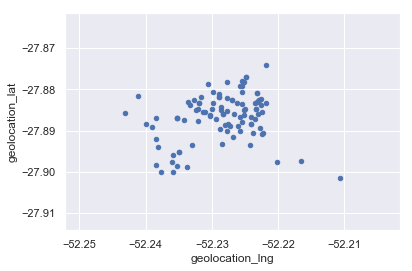

In [22]:
subset = geolocation[geolocation.geolocation_zip_code_prefix == 99900]
subset.plot('geolocation_lng', 'geolocation_lat', kind='scatter')

In [23]:
orders = orders.join(dedup_geolocation, on = 'customer_zip_code_prefix')

# Analysing Order Payments

Unsurprisingly, orders which tend to be paid in more payment methods tend to be vouchers rather than credit cards. 

In [24]:
order_payment = pd.read_csv("data/olist_order_payments_dataset.csv")

In [25]:
order_payment.shape

(103886, 5)

In [26]:
orders.shape

(99441, 16)

In [27]:
order_payment.order_id.value_counts().value_counts(normalize=True) * 100
# Majority of users pay using 1 method

1     97.022325
2      2.395414
3      0.302695
4      0.108608
5      0.052293
6      0.036203
7      0.028158
8      0.011062
9      0.009051
12     0.008045
11     0.008045
10     0.005028
13     0.003017
14     0.002011
15     0.002011
19     0.002011
26     0.001006
21     0.001006
22     0.001006
29     0.001006
Name: order_id, dtype: float64

In [28]:
num_payments = pd.DataFrame(order_payment.groupby('order_id').size())
num_payments.columns = ['num_payments']

In [29]:
order_payment = order_payment.join(num_payments, on='order_id')

In [43]:
pd.DataFrame(order_payment[order_payment.num_payments == 1].payment_type.value_counts(normalize=True) * 100).rename(columns = {'payment_type': '% of payments'})

,% of payments
credit_card,76.671607
boleto,20.506017
debit_card,1.581691
voucher,1.237575
not_defined,0.003109


In [44]:
pd.DataFrame(order_payment[order_payment.num_payments == 2].payment_type.value_counts(normalize=True) * 100).rename(columns = {'payment_type': '% of payments'})

,% of payments
credit_card,51.301427
voucher,48.635600
debit_card,0.062972


In [45]:
pd.DataFrame(order_payment[order_payment.num_payments == 3].payment_type.value_counts(normalize=True) * 100).rename(columns = {'payment_type': '% of payments'})

,% of payments
voucher,75.85825
credit_card,24.14175


In [104]:
order_payment[order_payment.num_payments > 3].payment_type.value_counts(normalize=True) * 100

voucher        90.747126
credit_card     9.252874
Name: payment_type, dtype: float64

In [46]:
order_payment[(order_payment.num_payments > 4) & (order_payment.payment_type == 'credit_card')].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,num_payments
534,ac14a1a3d8c2b071a150eb2990b5ecd8,1,credit_card,2,49.77,6
676,9c54a1816e487456bb7eb5082b9823ff,1,credit_card,1,2.01,8
1091,4d9190887b47ff1b89c657c788c038f6,1,credit_card,1,2.67,5
1632,c6492b842ac190db807c15aff21a7dd6,1,credit_card,3,81.77,12
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65,5


In [49]:
order_payment[order_payment.order_id == 'c6492b842ac190db807c15aff21a7dd6'].sort_values('payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,num_payments
1632,c6492b842ac190db807c15aff21a7dd6,1,credit_card,3,81.77,12
80685,c6492b842ac190db807c15aff21a7dd6,2,voucher,1,19.84,12
19338,c6492b842ac190db807c15aff21a7dd6,3,voucher,1,30.59,12
30158,c6492b842ac190db807c15aff21a7dd6,4,voucher,1,23.15,12
95468,c6492b842ac190db807c15aff21a7dd6,5,voucher,1,18.19,12
50671,c6492b842ac190db807c15aff21a7dd6,6,voucher,1,11.57,12
44136,c6492b842ac190db807c15aff21a7dd6,7,voucher,1,36.38,12
81871,c6492b842ac190db807c15aff21a7dd6,8,voucher,1,20.17,12
59139,c6492b842ac190db807c15aff21a7dd6,9,voucher,1,36.88,12
32926,c6492b842ac190db807c15aff21a7dd6,10,voucher,1,73.76,12


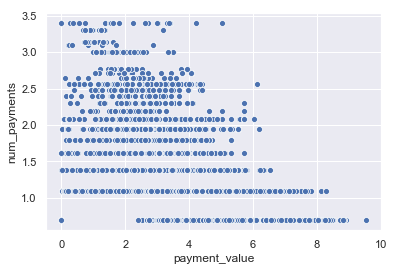

In [106]:
sns.scatterplot(np.log(order_payment.payment_value+1), np.log(order_payment.num_payments+1))

In [107]:
# Order with the highest number of payments
order_payment[order_payment.order_id == 'fa65dad1b0e818e3ccc5cb0e39231352'].sort_values('payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,num_payments
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71,29
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51,29
65641,fa65dad1b0e818e3ccc5cb0e39231352,3,voucher,1,2.95,29
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16,29
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66,29
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02,29
82593,fa65dad1b0e818e3ccc5cb0e39231352,7,voucher,1,0.32,29
68853,fa65dad1b0e818e3ccc5cb0e39231352,8,voucher,1,26.02,29
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08,29
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86,29


In [108]:
# Order with several payments, but used credit card
order_payment[order_payment.order_id == 'd7c320185a2f9b32f5e2370ff3f8bd64'].sort_values('payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,num_payments
83514,d7c320185a2f9b32f5e2370ff3f8bd64,1,credit_card,1,5.91,6
1044,d7c320185a2f9b32f5e2370ff3f8bd64,2,voucher,1,3.90,6
58160,d7c320185a2f9b32f5e2370ff3f8bd64,3,voucher,1,0.20,6
32350,d7c320185a2f9b32f5e2370ff3f8bd64,4,voucher,1,0.20,6
93519,d7c320185a2f9b32f5e2370ff3f8bd64,5,voucher,1,3.10,6
10990,d7c320185a2f9b32f5e2370ff3f8bd64,6,voucher,1,5.69,6


# Does payment information correlate with review?

In [109]:
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")

In [110]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [111]:
reviews.shape

(100000, 7)

In [112]:
reviews.groupby('order_id').size().sort_values(ascending=False).head()

order_id
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
241ed1aad96c4cc788ee6f8ab96242ef    2
dtype: int64

In [113]:
reviews[reviews.order_id == 'c88b1d1b157a9999ce368f218a407141']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1997,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
83187,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
90069,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


In [114]:
review_score = reviews.groupby('order_id').agg({'review_score': 'mean'})

In [115]:
order_payment_summary = order_payment.drop(['payment_sequential'], axis=1).groupby('order_id').agg('mean').join(review_score)

In [130]:
pandas_profiling.ProfileReport(order_payment_summary)

Number of variables,5
Number of observations,99440
Total Missing (%),0.0%
Total size in memory,3.8 MiB
Average record size in memory,40.0 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


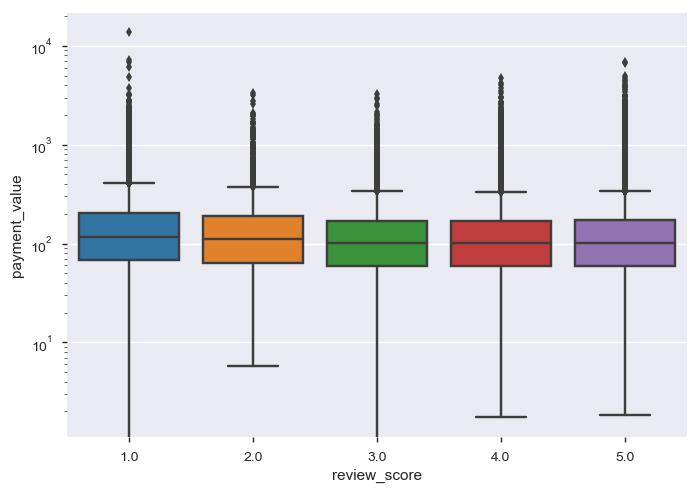

In [143]:
g = sns.boxplot(np.round(order_payment_summary.review_score), order_payment_summary.payment_value)
g.axes.set_yscale('log')

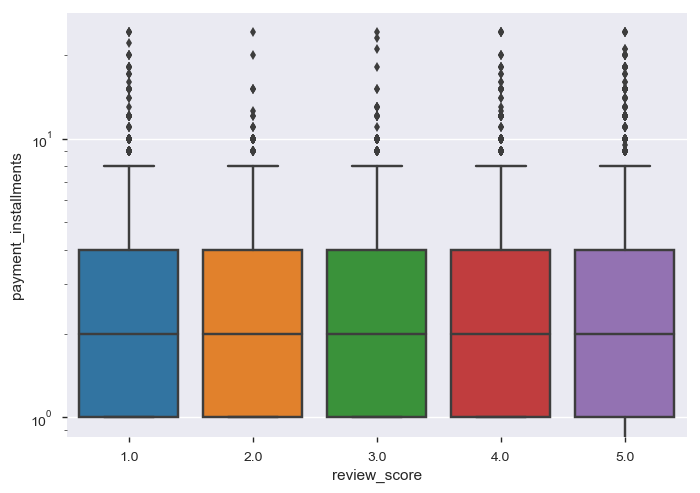

In [144]:
g = sns.boxplot(np.round(order_payment_summary.review_score), order_payment_summary.payment_installments)
g.axes.set_yscale('log')

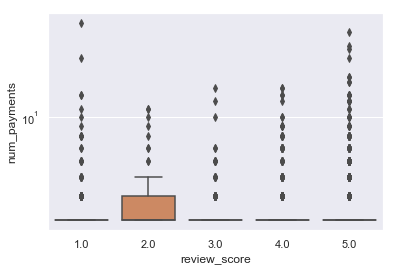

In [124]:
g = sns.boxplot(np.round(order_payment_summary[order_payment_summary.num_payments > 1].review_score), order_payment_summary[order_payment_summary.num_payments > 1].num_payments+1)
plt.yscale('log')

Surprisingly, payment information is not correlated with the average review score (that is, 'cheapskates' are just as likely/unlikely to leave a good or bad review). In fact, it looks like those who have more payments (use more vouchers) tend to leave higher reviews??

# Products

In [125]:
orders.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_diff,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,7 days 02:34:47,-23.576983,-46.587161,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,5 days 08:32:15,-12.177924,-44.660711,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,17 days 05:53:31,-16.745150,-48.514783,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,12 days 23:31:18,-5.774190,-35.271143,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9 days 05:42:58,-23.676370,-46.514627,santo andre,SP


In [126]:
products = pd.read_csv("data/olist_products_dataset.csv").set_index('product_id')

In [127]:
products.head()

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_id,,,,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [162]:
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [141]:
# product_categories = list(products.product_category_name.value_counts().index)

# from googletrans import Translator
# translator = Translator()

# translated_categories = {}

# for x in tqdm_notebook(product_categories):
#     x_cleaned = x.replace("_", " ")
#     x_translated = translator.translate(x_cleaned, src='pt').text
#     translated_categories[x] = x_translated

# import json
# with open("processed-data/translated_categories.json", "w") as f:
#     json.dump(translated_categories, f)

In [168]:
import json
with open("processed-data/translated_categories.json") as f:
    translated_categories = json.load(f)

In [172]:
def translate(x):
    try:
        return translated_categories[x]
    except:
        return ''

products.product_category_name = products.product_category_name.apply(translate)

In [128]:
order_items = pd.read_csv("data/olist_order_items_dataset.csv")

In [129]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [214]:
order_items[order_items.order_item_id == 15]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
11946,1b15974a0141d54e36626dca3fdc731a,15,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12,computer accessories
29271,428a2f660dc84138d969ccd69a0ab6d5,15,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,decoration furniture
57311,8272b63d03f5f79c56e9e4120aec44ef,15,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beauty health
69654,9ef13efd6949e4573a18964dd1bbe7f5,15,37eb69aca8718e843d897aa7b82f462d,0b36063d5818f81ccb94b54adfaebbf5,2017-02-03 21:44:49,51.00,1.20,garden tools
75117,ab14fdcfbe524636d65ee38360e22ce8,15,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44,automotive


In [215]:
order_items[order_items.order_id == '1b15974a0141d54e36626dca3fdc731a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11933,1b15974a0141d54e36626dca3fdc731a,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11934,1b15974a0141d54e36626dca3fdc731a,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11935,1b15974a0141d54e36626dca3fdc731a,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11936,1b15974a0141d54e36626dca3fdc731a,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11937,1b15974a0141d54e36626dca3fdc731a,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11938,1b15974a0141d54e36626dca3fdc731a,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11940,1b15974a0141d54e36626dca3fdc731a,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories
11941,1b15974a0141d54e36626dca3fdc731a,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12,computer accessories


In [208]:
order_items = order_items.join(products[['product_category_name']], on='product_id')

In [248]:
products_sold_counts = pd.DataFrame(order_items.product_category_name.value_counts())
products_catalog_counts = pd.DataFrame(products.product_category_name.value_counts())
products_sold_value = order_items.groupby('product_category_name').sum()[['price']]

products_sold_counts.columns = ['sold_counts']
products_catalog_counts.columns = ['catalog_counts']

products_sold_info = products_sold_value.join(products_catalog_counts).join(products_sold_counts)

products_sold_info['sold_percent'] = products_sold_info.sold_counts / order_items.shape[0]
products_sold_info['catalog_percent'] = products_sold_info.catalog_counts / products.shape[0]
products_sold_info['price_percent'] = products_sold_info.price / products_sold_info.price.sum()

In [257]:
products_sold_info.sort_values('price', ascending=False).head()

,price,catalog_counts,sold_counts,sold_percent,catalog_percent,price_percent
product_category_name,,,,,,
beauty health,1258681.34,2444,9670,0.085841,0.074171,0.092607
watches present,1205005.68,1329,5991,0.053182,0.040333,0.088658
bed table bath,1036988.68,3029,11115,0.098668,0.091924,0.076296
leisure sport,988048.97,2867,8641,0.076707,0.087008,0.072695
computer accessories,911954.32,1639,7827,0.069481,0.049741,0.067097


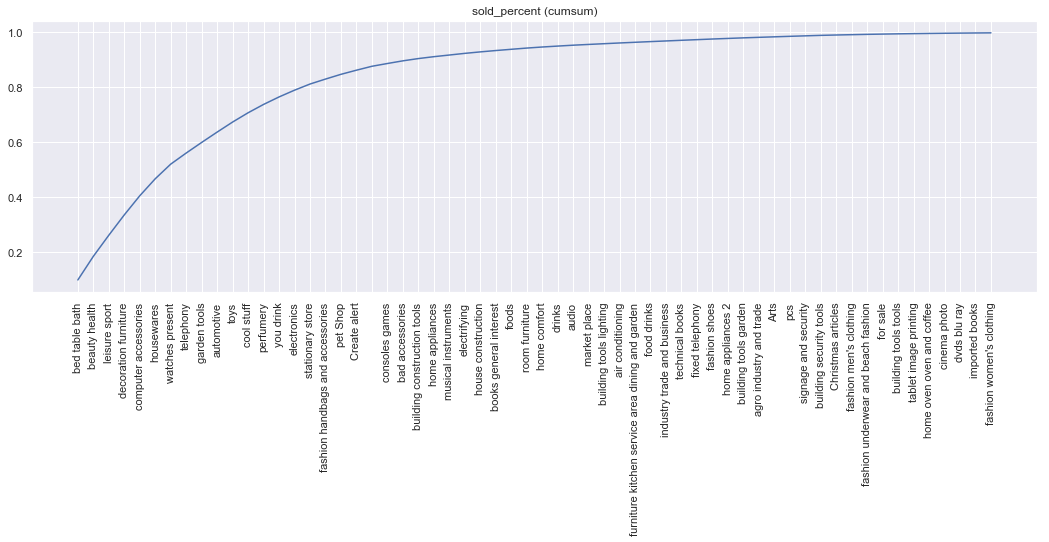

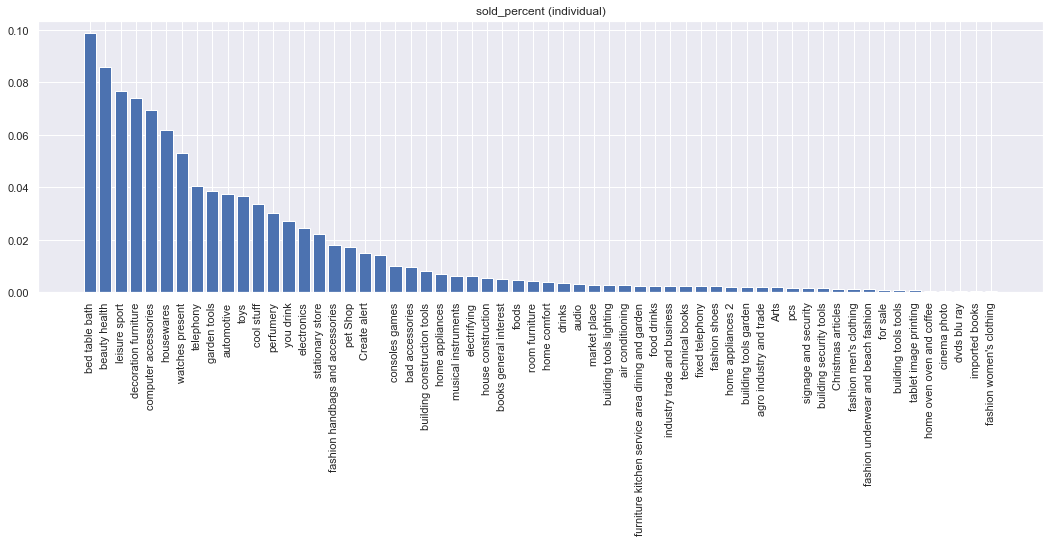

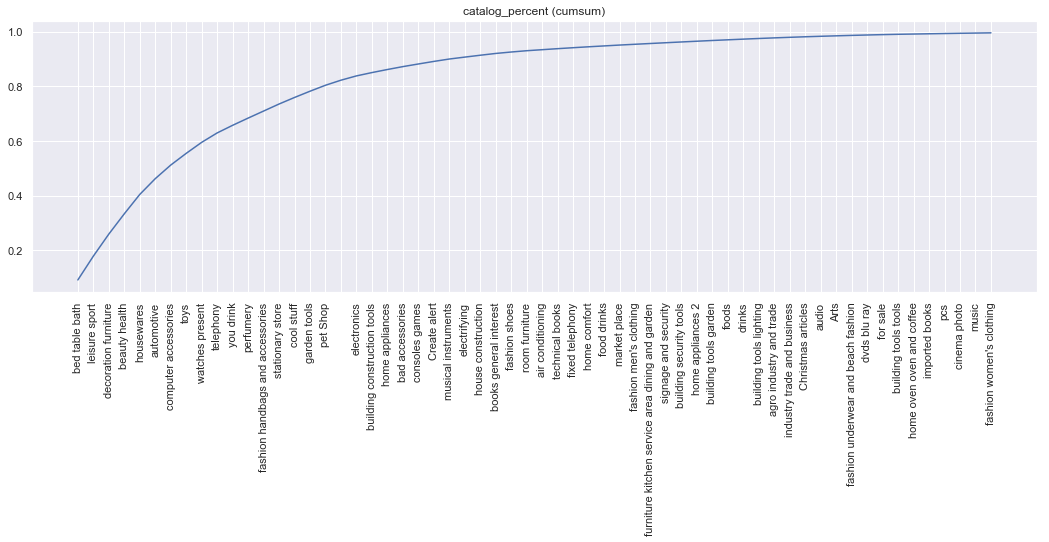

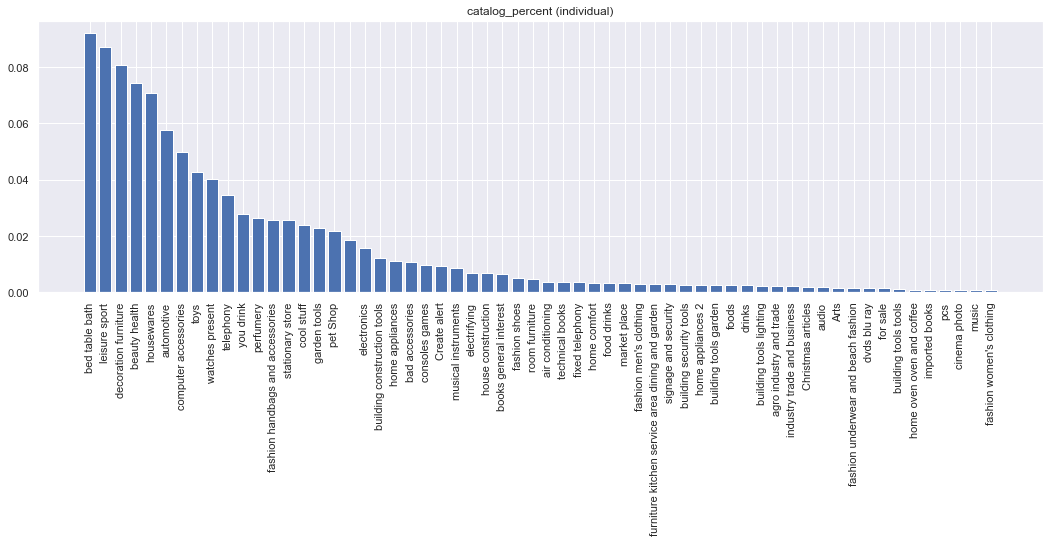

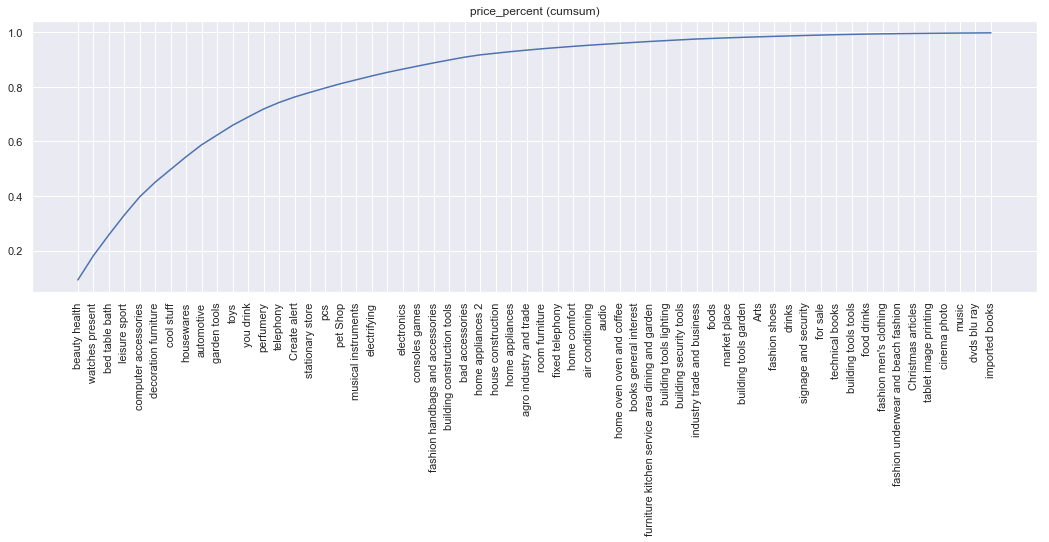

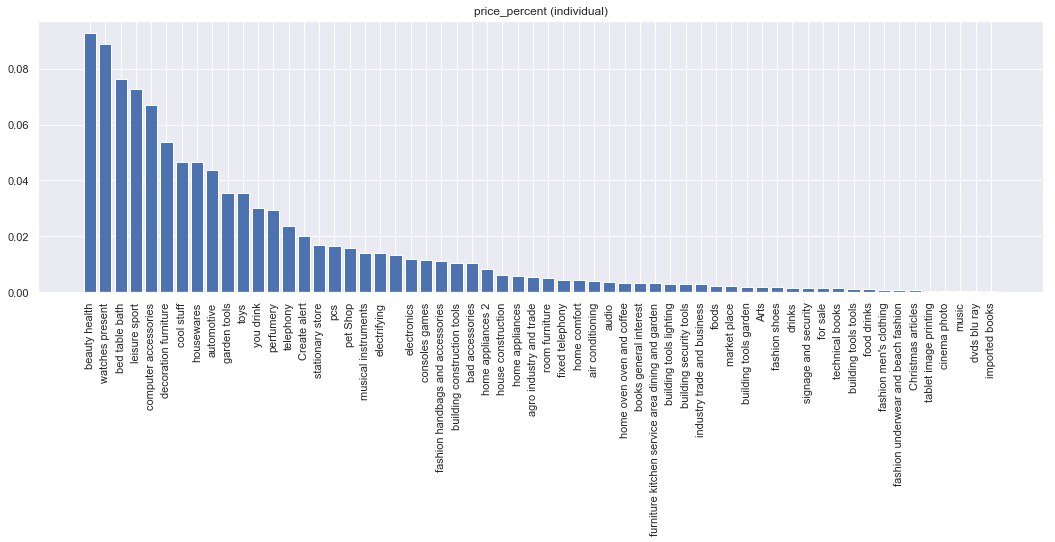

In [279]:
for col in ['sold_percent', 'catalog_percent', 'price_percent']:
    plt.figure(figsize=(18,5))
    plt.title(col + " (cumsum)")
    values = products_sold_info.sort_values(col, ascending=False)[col][:60]
    plt.plot(values.cumsum())    
    plt.xticks(rotation=90)
    plt.show()
    
    plt.figure(figsize=(18,5))
    plt.title(col + " (individual)")
    plt.bar(values.index, values)
    plt.xticks(rotation=90)
    plt.show()

In [300]:
customer_order_items = order_items.groupby('order_id').agg({'price': ['size', 'sum']})
customer_order_items.columns = ['num', 'price']
customer_order_items = customer_order_items.join(orders.set_index('order_id')[['customer_unique_id']])

customer_order_items = customer_order_items.groupby('customer_unique_id').agg({'num': ['size', 'sum', 'mean'], 'price': ['sum', 'mean']})
customer_order_items.columns = ['num_orders', 'total_num_products', 'avg_num_products', 'total_price', 'avg_price']

In [303]:
customer_order_items.head()

,num_orders,total_num_products,avg_num_products,total_price,avg_price
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1,1.0,129.90,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,1.0,18.90,18.90
0000f46a3911fa3c0805444483337064,1,1,1.0,69.00,69.00
0000f6ccb0745a6a4b88665a16c9f078,1,1,1.0,25.99,25.99
0004aac84e0df4da2b147fca70cf8255,1,1,1.0,180.00,180.00


1     0.969472
2     0.028013
3     0.002012
4     0.000304
5     0.000094
6     0.000052
7     0.000031
16    0.000010
9     0.000010
Name: num_orders, dtype: float64

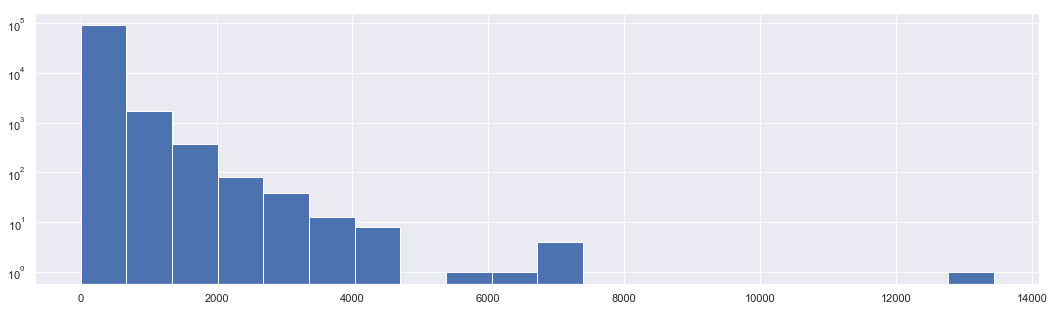

In [321]:
plt.figure(figsize=(18,5))
customer_order_items.total_price.hist(bins=20)
plt.yscale('log')

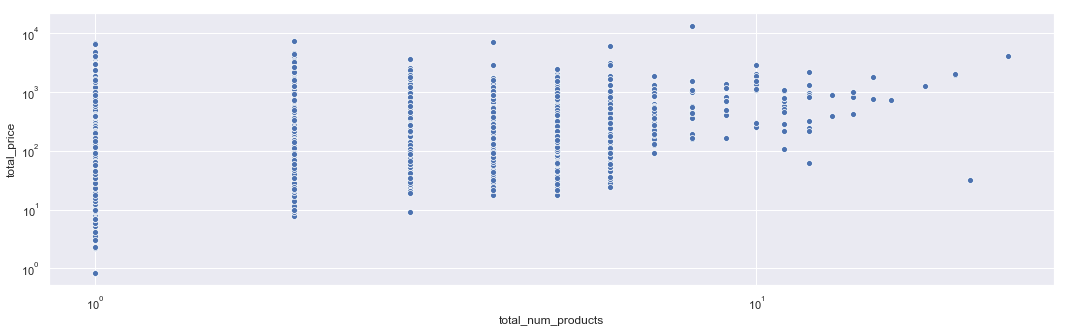

In [325]:
plt.figure(figsize=(18,5))
sns.scatterplot(customer_order_items.total_num_products, customer_order_items.total_price)
plt.xscale('log')
plt.yscale('log')